# Requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [3]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 4.72MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [4]:
df=pd.read_csv('/content/climate-data.csv')

Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [5]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


array([[<Axes: title={'center': 'meantemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'meanpressure'}>]], dtype=object)

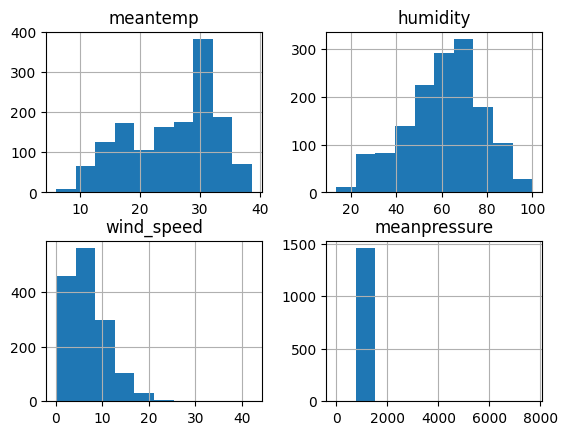

In [6]:
df.hist()

In [7]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [8]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [9]:
fea=['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [10]:
df_copy=df.copy()

In [11]:
for column in fea:
    df[column+'_1'] = df[column].shift(periods=1)
    df[column+'_2'] = df[column].shift(periods=2)
    df[column+'_3'] = df[column].shift(periods=3)
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_1,meantemp_2,meantemp_3,humidity_1,humidity_2,humidity_3,wind_speed_1,wind_speed_2,wind_speed_3,meanpressure_1,meanpressure_2,meanpressure_3
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,10.000000,NaN,NaN,84.500000,NaN,NaN,0.000000,NaN,NaN,1015.666667,NaN,NaN
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,10.000000,NaN,92.000000,84.500000,NaN,2.980000,0.000000,NaN,1017.800000,1015.666667,NaN
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.000000,87.000000,92.000000,84.500000,4.633333,2.980000,0.000000,1018.666667,1017.800000,1015.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.400000,71.333333,87.000000,92.000000,1.233333,4.633333,2.980000,1017.166667,1018.666667,1017.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,17.142857,14.000000,67.550000,74.857143,94.300000,8.335000,8.784211,9.085000,1017.200000,1016.952381,1014.350000
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,16.850000,17.142857,68.043478,67.550000,74.857143,3.547826,8.335000,8.784211,1015.565217,1017.200000,1016.952381
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,17.217391,16.850000,87.857143,68.043478,67.550000,6.000000,3.547826,8.335000,1016.904762,1015.565217,1017.200000
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,14.095238,15.238095,17.217391,89.666667,87.857143,68.043478,6.266667,6.000000,3.547826,1017.904762,1016.904762,1015.565217


In [34]:
df.dropna(axis=0).reset_index()

,index,date,meantemp,humidity,wind_speed,meanpressure,meantemp_1,meantemp_2,meantemp_3,humidity_1,humidity_2,humidity_3,wind_speed_1,wind_speed_2,wind_speed_3,meanpressure_1,meanpressure_2,meanpressure_3
0,3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.000000,87.000000,92.000000,84.500000,4.633333,2.980000,0.000000,1018.666667,1017.800000,1015.666667
1,4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.400000,71.333333,87.000000,92.000000,1.233333,4.633333,2.980000,1017.166667,1018.666667,1017.800000
2,5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,8.666667,7.166667,86.833333,71.333333,87.000000,3.700000,1.233333,4.633333,1016.500000,1017.166667,1018.666667
3,6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,6.000000,8.666667,82.800000,86.833333,71.333333,1.480000,3.700000,1.233333,1018.000000,1016.500000,1017.166667
4,7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,7.000000,6.000000,78.600000,82.800000,86.833333,6.300000,1.480000,3.700000,1020.000000,1018.000000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,17.142857,14.000000,67.550000,74.857143,94.300000,8.335000,8.784211,9.085000,1017.200000,1016.952381,1014.350000
1455,1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,16.850000,17.142857,68.043478,67.550000,74.857143,3.547826,8.335000,8.784211,1015.565217,1017.200000,1016.952381
1456,1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,17.217391,16.850000,87.857143,68.043478,67.550000,6.000000,3.547826,8.335000,1016.904762,1015.565217,1017.200000
1457,1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,14.095238,15.238095,17.217391,89.666667,87.857143,68.043478,6.266667,6.000000,3.547826,1017.904762,1016.904762,1015.565217


In [36]:
df = df.dropna(axis=0).reset_index()

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

In [19]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure',
       'meantemp_1', 'meantemp_2', 'meantemp_3', 'humidity_1', 'humidity_2',
       'humidity_3', 'wind_speed_1', 'wind_speed_2', 'wind_speed_3',
       'meanpressure_1', 'meanpressure_2', 'meanpressure_3'],
      dtype='object')

In [21]:
fea=['meantemp_1', 'meantemp_2', 'meantemp_3', 'humidity_1', 'humidity_2',
       'humidity_3', 'wind_speed_1', 'wind_speed_2', 'wind_speed_3',
       'meanpressure_1', 'meanpressure_2', 'meanpressure_3']

In [38]:
X,Y=df[fea],df['meantemp']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [42]:
scaler.fit(X_train)

MinMaxScaler()

In [43]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [45]:
df.isnull().sum()

index             0
date              0
meantemp          0
humidity          0
wind_speed        0
meanpressure      0
meantemp_1        0
meantemp_2        0
meantemp_3        0
humidity_1        0
humidity_2        0
humidity_3        0
wind_speed_1      0
wind_speed_2      0
wind_speed_3      0
meanpressure_1    0
meanpressure_2    0
meanpressure_3    0
dtype: int64

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [13]:
# Write your code here. Add as many boxes as you need.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=15)

In [52]:
rf.fit(X_train, Y_train)

<ipython-input-52-d0055dbae671>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestRegressor(max_depth=15, n_estimators=1500)

Use the trained model to make predictions for the test set.

In [53]:
# Write your code here. Add as many boxes as you need.

In [54]:
y_pred = rf.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [55]:
# Write your code here. Add as many boxes as you need.

In [56]:
from sklearn.metrics import r2_score

In [57]:
print(r2_score(Y_test,y_pred))

-25.403554814405936


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [16]:
# Write your code here. Add as many boxes as you need.

In [61]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=15,alpha=0.01,n_estimators=10)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:23] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Use the trained model to make predictions for the test set.

In [17]:
# Write your code here. Add as many boxes as you need.

In [62]:
y_pred2=model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [18]:
# Write your code here. Add as many boxes as you need.

In [63]:
print(r2_score(Y_test,y_pred2))

-25.53056122116993


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,shuffle=False)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [66]:
scaler.fit(X_train)

MinMaxScaler()

In [67]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [68]:
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [70]:
bestScore=-999999
bestK=-9999999999
for i in range(5,50,5):
  rf = RandomForestRegressor(n_estimators=150, criterion='squared_error', max_depth=i)
  rf.fit(X_train,Y_train)
  y_pred=rf.predict(X_test)
  score=r2_score(Y_test,y_pred)
  if (score>bestScore):
    bestScore=score
    bestK=i

<ipython-input-70-288f8d7f34ea>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)
<ipython-input-70-288f8d7f34ea>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)
<ipython-input-70-288f8d7f34ea>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)
<ipython-input-70-288f8d7f34ea>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)
<ipython-input-70-288f8d7f34ea>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [71]:
print(bestScore)
print(bestK)

-19.742727822053673
5


## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.